# Video Games Sales Analysis

## Introduction

This notebook analyzes the **'Video Games Sales as at 22 Dec 2016'** dataset from Kaggle. Our goal is to extract insights on three key aspects:

1. **Distribution of Global Sales** – How many copies do most games sell?
2. **Genre Analysis** – Which game genres typically achieve the highest average sales?
3. **Platform Analysis** – How do sales vary across different gaming platforms?

The notebook is organized into clear sections so that anyone can follow the complete workflow—from data inspection and cleaning to detailed analysis and final conclusions.

## Main Goal and Analysis Steps

### Main Goal

- **Understand the distribution of video game sales.**
- **Identify which game genres achieve higher average sales.**
- **Examine how sales vary across gaming platforms.**

### Analysis Steps

1. **Data Exploration:** Load and preview the dataset to understand its structure.
2. **Data Inspection and Cleaning:** Check data types, missing values, and duplicates; then filter out rows with missing values in key columns.
3. **Initial Statistics:** Compute descriptive statistics to summarize numerical features.
4. **Question 1 – Global Sales Distribution:** Visualize sales distribution using a standard histogram, a log-scale histogram, a density plot, and a box plot.
5. **Question 2 – Genre Analysis:** Analyze average and median global sales by genre and visualize using tables, horizontal bar charts, and pie charts.
6. **Question 3 – Platform Analysis:** Compare total global sales by platform using tables, horizontal bar charts, and pie charts.
7. **Conclusion:** Summarize the key findings and insights.

This notebook clearly documents every step—from data inspection and cleaning to the final analysis—ensuring full transparency and ease of review.

## Data Exploration

We begin by loading the dataset and taking an initial look at its structure. The first 10 rows are displayed for a quick overview.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# Load dataset from Kaggle attached data
data_path = "/kaggle/input/video-games-sales-as-at-22-dec-2016csv/Video_Games_Sales_as_at_22_Dec_2016.csv"
df = pd.read_csv(data_path, encoding='ISO-8859-1')

print(f"Dataset contains {df.shape[0]} games and {df.shape[1]} features.")
df.head(10)

Dataset contains 16719 games and 16 features.


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


## Data Inspection and Cleaning

This section provides a detailed inspection of the dataset and cleans the data for analysis.

### Steps in this Section:

1. **Data Structure:** Check data types and overall structure with `df.info()`.
2. **Missing Values:** Identify missing values across columns and print counts.
3. **Duplicates:** Check for any duplicate rows.
4. **Filtering:** Drop rows with missing values in the key columns: `Global_Sales`, `Genre`, and `Platform`.

This section ensures that our analysis is based on a clean and reliable dataset.

In [2]:
# Check data structure
df.info()

# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
Missing val

In [3]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [4]:
# Focus on key columns and drop rows with missing values
key_cols = ['Global_Sales', 'Genre', 'Platform']
for col in key_cols:
    print(f"{col} missing: {df[col].isnull().sum()}")

df_clean = df.dropna(subset=key_cols)
print(f"After dropping rows with missing key values, dataset has {df_clean.shape[0]} rows.")

Global_Sales missing: 0
Genre missing: 2
Platform missing: 0
After dropping rows with missing key values, dataset has 16717 rows.


## Initial Statistics on the Data

We compute descriptive statistics to summarize the numerical columns in the dataset.

In [5]:
df_clean.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


## Analysis Steps and Insights

Below, we detail the analysis steps taken to answer our three main questions. Each question is addressed in its own section with targeted visualizations and detailed insights.

1. **Question 1:** Analyze the distribution of global sales using histograms (with standard and log scales), density plots, and box plots.
2. **Question 2:** Compare average (and median) global sales by game genre using tables, bar charts, and pie charts.
3. **Question 3:** Examine global sales across gaming platforms with tables, horizontal bar charts, and pie charts.

These steps ensure a clear and thorough analysis of the data.

### Question 1: Distribution of Global Sales

Global sales data is highly right-skewed. We first focus on the most common range (0–5 million units) and then present a secondary view using a log scale to capture the full spectrum, including outliers.

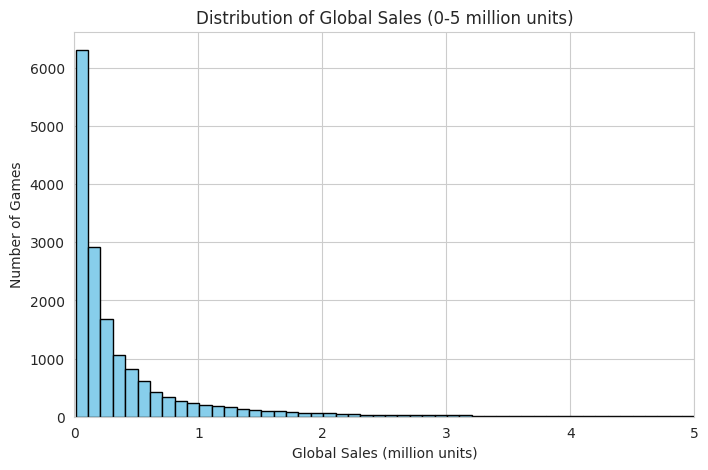

In [6]:
# Histogram for Global Sales in the 0-5 million range
if 'Global_Sales' in df_clean.columns:
    common_sales = df_clean[df_clean['Global_Sales'] <= 5]['Global_Sales']
    plt.figure(figsize=(8,5))
    plt.hist(common_sales, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Global Sales (0-5 million units)')
    plt.xlabel('Global Sales (million units)')
    plt.ylabel('Number of Games')
    plt.xlim(0,5)
    plt.show()
else:
    print("Global_Sales column not found.")

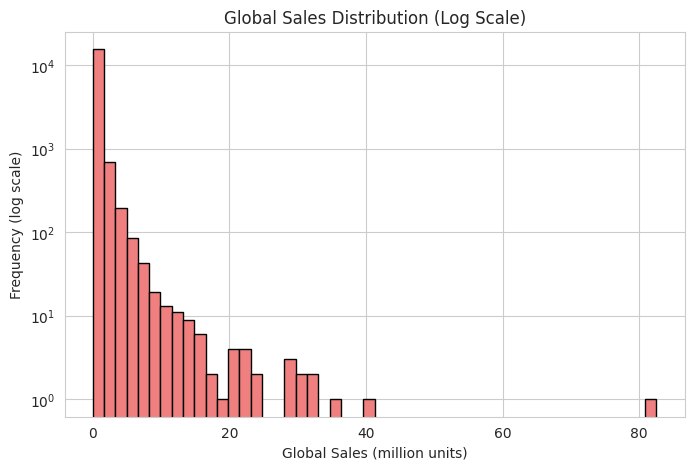

In [7]:
# Log-scale histogram to capture full sales range
if 'Global_Sales' in df_clean.columns:
    plt.figure(figsize=(8,5))
    plt.hist(df_clean['Global_Sales'].dropna(), bins=50, color='lightcoral', edgecolor='black')
    plt.yscale('log')
    plt.title('Global Sales Distribution (Log Scale)')
    plt.xlabel('Global Sales (million units)')
    plt.ylabel('Frequency (log scale)')
    plt.show()
else:
    print("Global_Sales column not found.")

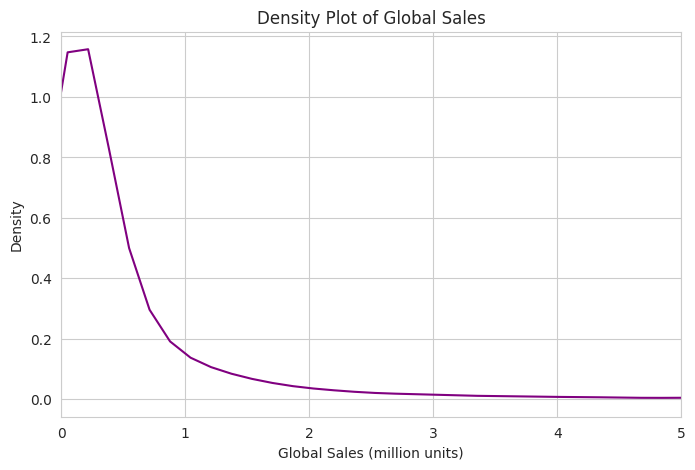

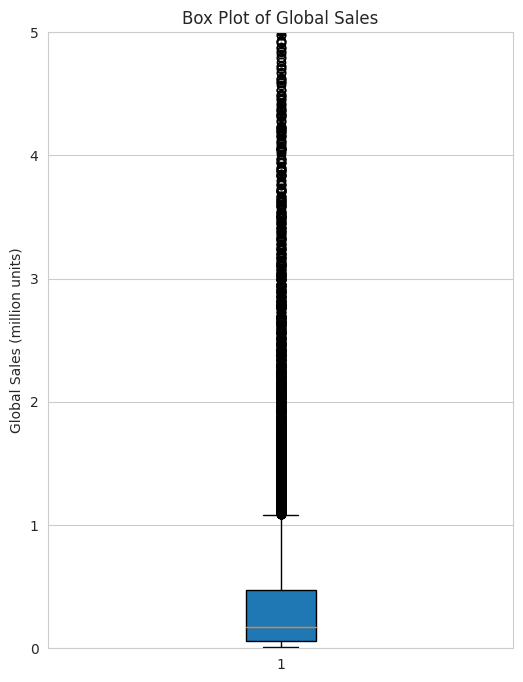

In [8]:
# Density Plot and Box Plot for Global Sales (0-5M)
if 'Global_Sales' in df_clean.columns:
    plt.figure(figsize=(8,5))
    df_clean['Global_Sales'].dropna().plot(kind='density', color='purple')
    plt.title('Density Plot of Global Sales')
    plt.xlabel('Global Sales (million units)')
    plt.xlim(0,5)
    plt.show()

    plt.figure(figsize=(6,8))
    plt.boxplot(df_clean['Global_Sales'].dropna(), vert=True, patch_artist=True)
    plt.title('Box Plot of Global Sales')
    plt.ylabel('Global Sales (million units)')
    plt.ylim(0,5)
    plt.show()
else:
    print("Global_Sales column not found.")

**Insights for Question 1:**

- The standard histogram and density plot reveal that most games sell below 1 million copies.
- The log-scale histogram highlights a few outliers, confirming the long-tail distribution.
- The box plot (focused on 0–5 million) clearly shows that the bulk of games have modest sales while blockbusters exist as extreme outliers.

### Question 2: Genre Analysis

Next, we compare game genres by average global sales. We provide a table of average sales, a horizontal bar chart for the top 5 genres, and a pie chart showing their market share. An additional bar chart for median sales is included for further insight.

In [9]:
# Table of Average Global Sales by Genre
if 'Genre' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    genre_avg = df_clean.groupby('Genre')['Global_Sales'].mean()
    genre_table = genre_avg.sort_values(ascending=False).to_frame(name='Average Global Sales')
    print("Top 10 Genres by Average Global Sales:")
    display(genre_table.head(10))
else:
    print("Required columns not found.")

Top 10 Genres by Average Global Sales:


,Average Global Sales
Genre,
Platform,0.932523
Shooter,0.795873
Role-Playing,0.622933
Racing,0.583587
Sports,0.567291
Fighting,0.527067
Action,0.517884
Misc,0.458960
Simulation,0.446705


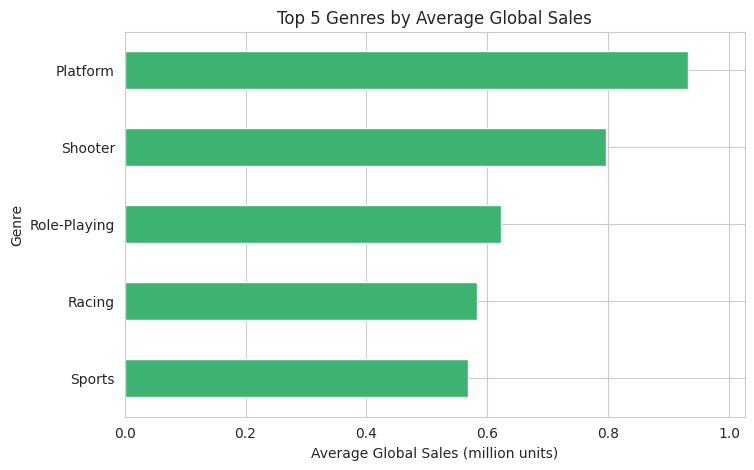

In [10]:
# Horizontal Bar Chart for Top 5 Genres by Average Global Sales
if 'Genre' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    top_genres = genre_avg.sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,5))
    top_genres.sort_values().plot(kind='barh', color='mediumseagreen')
    plt.title('Top 5 Genres by Average Global Sales')
    plt.xlabel('Average Global Sales (million units)')
    plt.xlim(0, top_genres.max()*1.1)
    plt.show()
else:
    print("Required columns not found.")

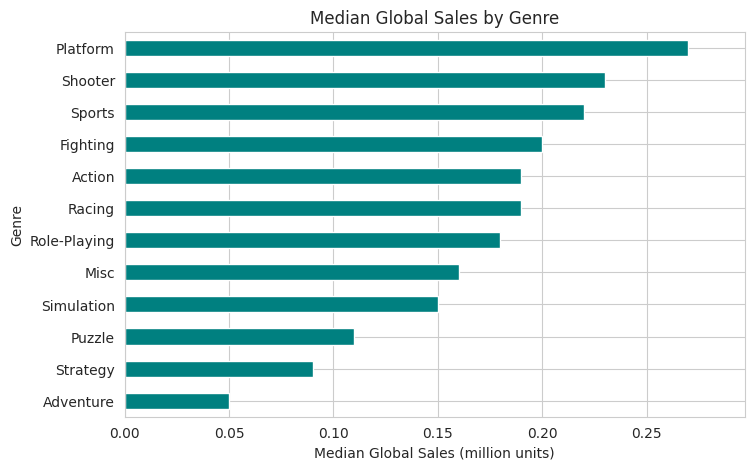

In [11]:
# Additional: Bar Chart for Median Global Sales by Genre
if 'Genre' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    genre_median = df_clean.groupby('Genre')['Global_Sales'].median()
    plt.figure(figsize=(8,5))
    genre_median.sort_values().plot(kind='barh', color='teal')
    plt.title('Median Global Sales by Genre')
    plt.xlabel('Median Global Sales (million units)')
    plt.xlim(0, genre_median.max()*1.1)
    plt.show()
else:
    print("Required columns not found.")

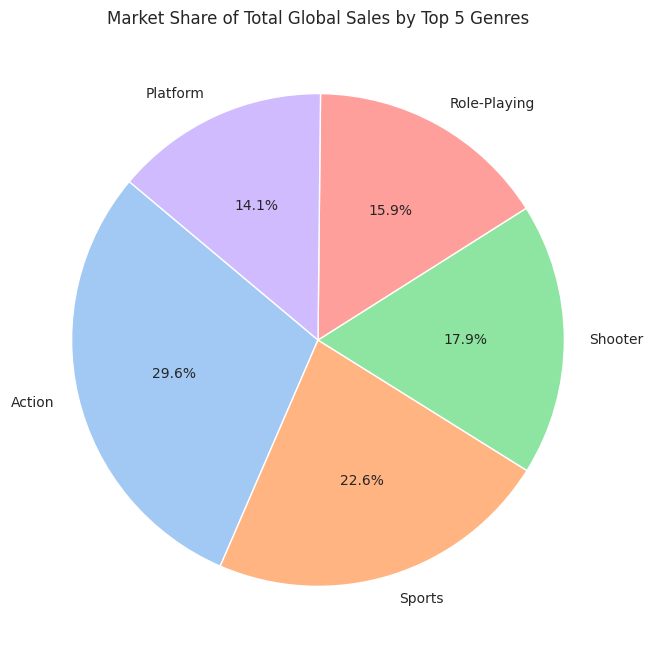

In [12]:
# Pie Chart for Market Share of Total Global Sales by Top 5 Genres
if 'Genre' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    genre_total = df_clean.groupby('Genre')['Global_Sales'].sum()
    top5_total = genre_total.sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,8))
    top5_total.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Market Share of Total Global Sales by Top 5 Genres')
    plt.ylabel('')
    plt.show()
else:
    print("Required columns not found.")

**Insights from Question 2:**

- Average and median sales both indicate that genres like **Shooter** and **Action** outperform others.
- The pie chart shows that these top genres capture a large market share.

Thus, mainstream, high-budget genres tend to dominate global sales.

### Question 3: Platform Analysis

Finally, we analyze global sales by gaming platform. We provide a table, a horizontal bar chart, and a pie chart to show the total sales and market share per platform.

In [13]:
# Table: Total Global Sales by Platform
if 'Platform' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    platform_sales = df_clean.groupby('Platform')['Global_Sales'].sum()
    platform_table = platform_sales.sort_values(ascending=False).to_frame(name='Total Global Sales')
    print("Top Platforms by Total Global Sales:")
    display(platform_table.head(10))
else:
    print("Required columns not found.")

Top Platforms by Total Global Sales:


,Total Global Sales
Platform,
PS2,1255.64
X360,971.63
PS3,939.43
Wii,908.13
DS,807.10
PS,730.68
GBA,318.50
PS4,314.23
PSP,294.30


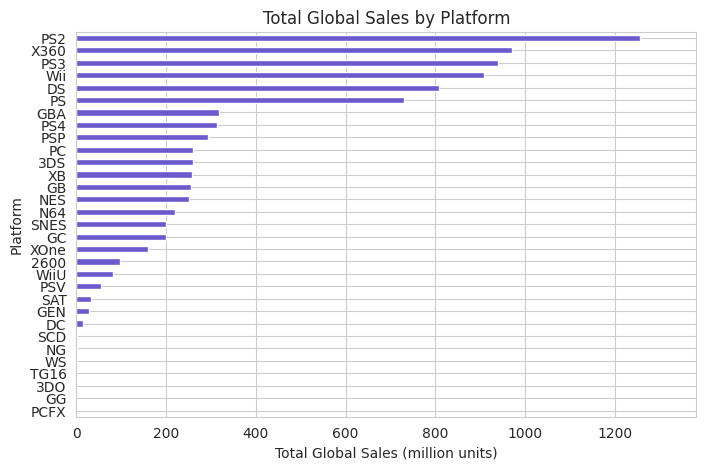

In [14]:
# Horizontal Bar Chart for Total Global Sales by Platform
if 'Platform' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    plt.figure(figsize=(8,5))
    platform_sales.sort_values().plot(kind='barh', color='slateblue')
    plt.title('Total Global Sales by Platform')
    plt.xlabel('Total Global Sales (million units)')
    plt.xlim(0, platform_sales.max()*1.1)
    plt.ylabel('Platform')
    plt.show()
else:
    print("Required columns not found.")

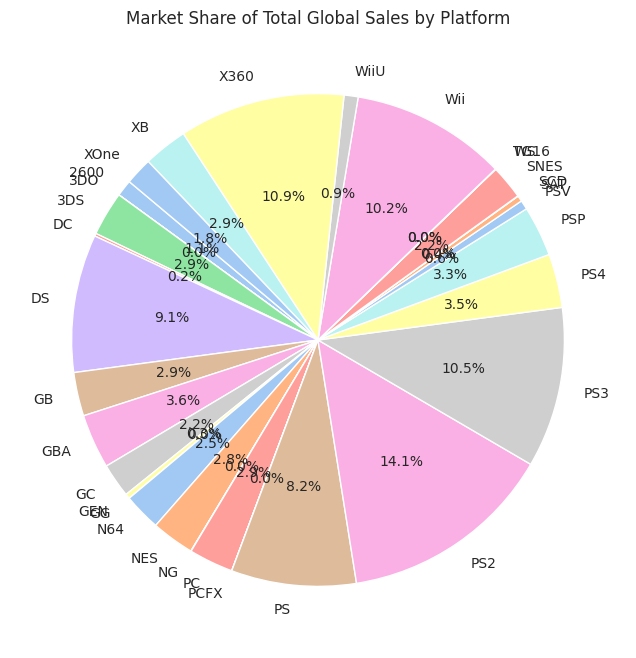

In [15]:
# Pie Chart: Market Share of Total Global Sales by Platform
if 'Platform' in df_clean.columns and 'Global_Sales' in df_clean.columns:
    plt.figure(figsize=(8,8))
    platform_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Market Share of Total Global Sales by Platform')
    plt.ylabel('')
    plt.show()
else:
    print("Required columns not found.")

**Insights from Question 3:**

- The table reveals that a few platforms (e.g., PS2, Wii) dominate global sales.
- The bar chart clearly shows differences among platforms in terms of sales volume.
- The pie chart confirms that a small number of consoles hold a large market share.

Thus, blockbuster titles on select platforms drive the bulk of global sales.

## Data Analysis and Conclusion

**Summary of Key Findings:**

- **Global Sales Distribution:** The vast majority of video games sell under 1 million copies, with a few blockbusters driving the right-tail of the distribution.
- **Genre Performance:** Mainstream genres (especially Shooter and Action) exhibit the highest average and median sales, dominating the market.
- **Platform Variability:** Although many platforms host titles with modest sales, a small number (e.g., PS2, Wii) account for the majority of global sales.

These insights provide a clear and professional view of the video game market and answer the key questions regarding data inspection and the analysis steps.

**Data Inspection and Cleaning Section:** This is found under the **Data Observation and Cleaning** section (cells **data-info**, **check-duplicates**, and **drop-missing**). All steps from data exploration, missing value handling, and duplicate checks are clearly documented.

**Analysis Steps Included:**
1. Data Exploration (load and preview data, overview of key columns).
2. Data Inspection and Cleaning (checking data types, missing values, duplicates, and filtering).
3. Initial Statistics (descriptive statistics).
4. Detailed analysis for each key question (Global Sales Distribution, Genre Analysis, Platform Analysis) with multiple focused visualizations and insights.
5. Final conclusion summarizing the findings.

These steps provide a comprehensive roadmap of the work performed in this project.